# Building Machine Learning Model

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Machine Learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

warnings.filterwarnings("ignore")



In [3]:
# load the data
df = pd.read_csv("..\dataset\CLEANED_DATASET_DIR.csv")
df

,Unnamed: 0,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [7]:
# split the data
X = df.drop(columns=["CLASSES"])
y = df["CLASSES"]

In [8]:
# Train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#check the shape of X and Y
shape_of_X = X_train
shape_of_Y = y_train

print(f"Training set is {shape_of_X.shape}")
print(f"Testing set is {shape_of_Y.shape}")

Training set is (194, 15)
Testing set is (194,)


In [ ]:
# Feature Scaling Appliying Standardization

def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test) 

    return X_train_scaled, X_test_scaled

In [ ]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test) 

In [31]:
X_train_scaled[:3]

array([[-0.10280612,  0.91502056,  1.35966051,  0.        , -0.87563202,
         0.21321832,  1.28577038, -0.09206896, -0.69568332, -0.74341993,
        -0.72275836, -0.79648833, -0.76790976, -0.86275306, -1.01036297],
       [ 1.22874945,  1.14086533,  0.45009451,  0.        ,  0.22209084,
        -1.65484925,  0.14504117, -0.38015572,  1.00119988,  3.53088931,
         2.32910654,  1.88757476,  3.10086694,  2.93741047,  0.98974332],
       [ 0.51955138, -1.00465998, -0.45947148,  0.        ,  1.5942444 ,
        -1.25454906, -0.99568804, -0.14008342,  0.49000494, -0.168916  ,
        -0.31718158, -0.19488798, -0.24276653, -0.2850255 ,  0.98974332]])

In [32]:
X_test_scaled[:3]

array([[-1.41988826,  1.02794295, -1.36903747,  0.        , -0.32677059,
         0.14650162, -0.2352019 , -0.38015572,  0.61070375, -0.07699537,
         0.25303529,  0.17532762,  0.06301308,  0.12580299, -1.01036297],
       [-1.68041   , -1.00465998, -1.36903747,  0.        ,  0.22209084,
        -0.52066537, -0.99568804, -0.38015572,  0.71720269, -0.40637763,
        -0.41556406,  0.33729694, -0.42889324, -0.02825769, -1.01036297],
       [ 0.4327108 , -1.68219429, -0.45947148,  0.        , -1.15006273,
        -0.25379858,  0.90552731,  0.6761624 , -1.02228009, -0.91960114,
        -0.85728135, -0.86590375, -0.93409432, -0.88842984,  0.98974332]])

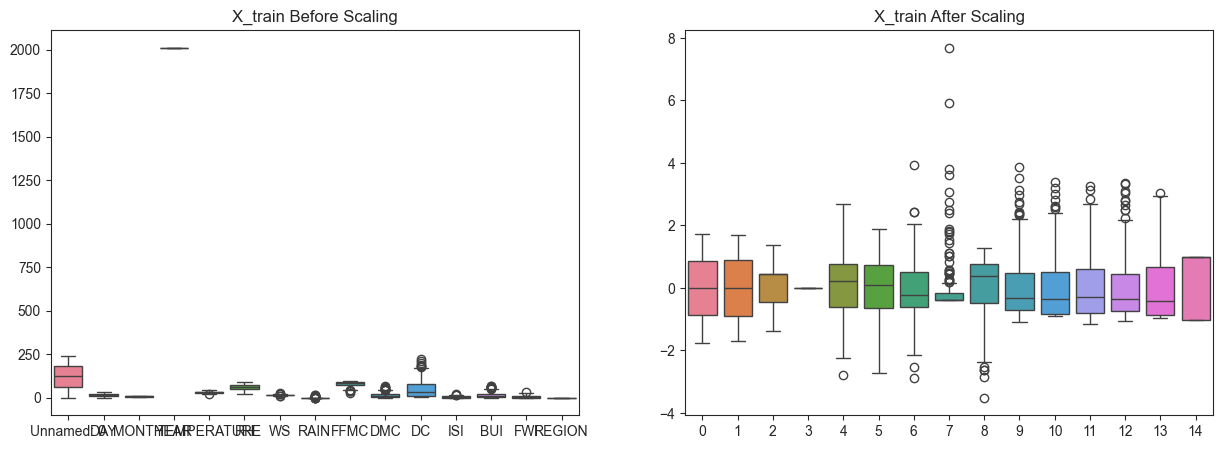

In [33]:
# Visualize the dataset before and after standard scaler

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")
plt.show()

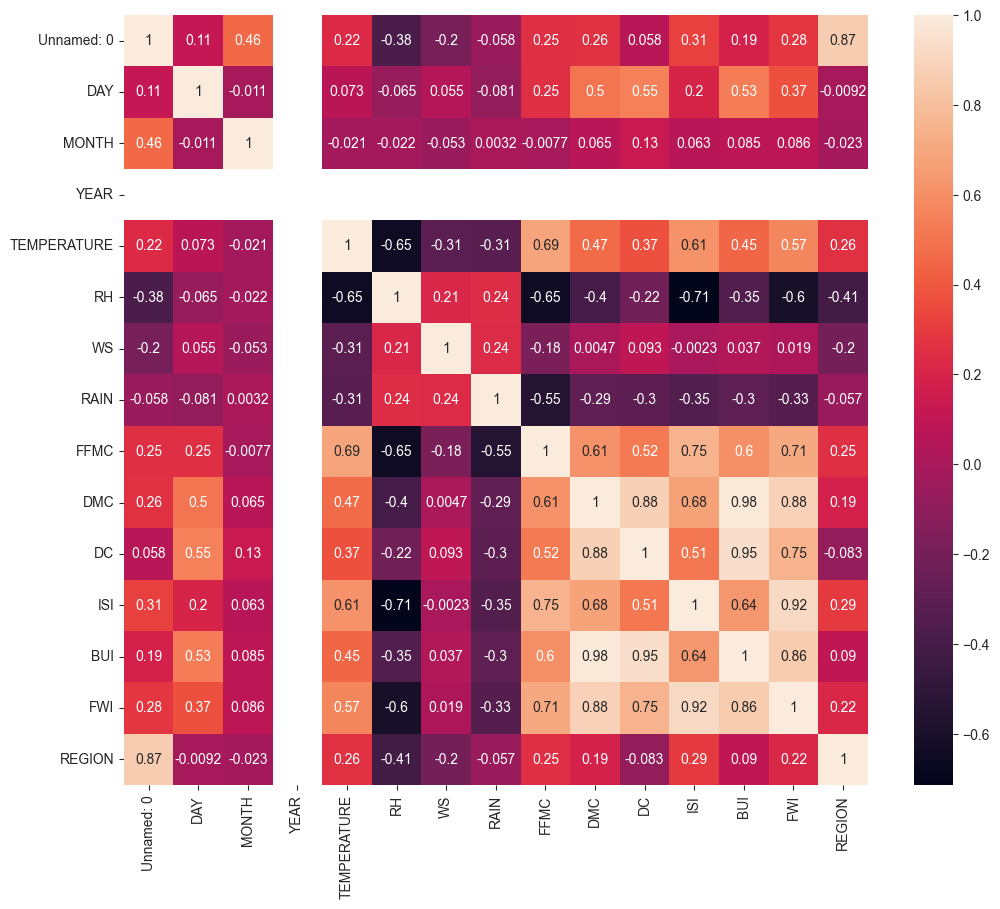

In [34]:
# check Pearson correllation
plt.figure(figsize=(12,10))

cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

Logistic Regression Report
Accuracy Score: 0.939%
Classification Report
               precision    recall  f1-score   support

        fire       0.93      0.96      0.95        27
    not fire       0.95      0.91      0.93        22

    accuracy                           0.94        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.94      0.94      0.94        49

Confusion Maxtrix



<Axes: >

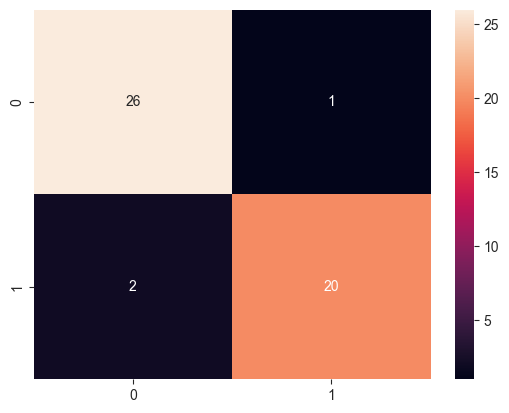

In [35]:
# Model Building
# 1. Logistic Regression

from sklearn.linear_model import LogisticRegression

loreg = LogisticRegression()

# training
loreg.fit(X_train_scaled, y_train)

# prediction
loreg_pred = loreg.predict(X_test_scaled)

# evaluate
score = accuracy_score(y_test, loreg_pred)
cr = classification_report(y_test, loreg_pred)

print("Logistic Regression Report")
print(f"Accuracy Score: {score:.3f}%")
print("Classification Report\n",cr)

print("Confusion Maxtrix\n")
sns.heatmap(confusion_matrix(y_test, loreg_pred), annot=True)

Decision Tree Report
Accuracy Score: 0.980%
Classification Report
               precision    recall  f1-score   support

        fire       1.00      0.96      0.98        27
    not fire       0.96      1.00      0.98        22

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49

Confusion Maxtrix



<Axes: >

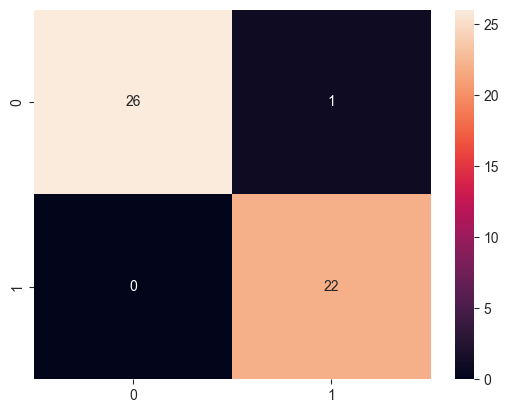

In [36]:
# 2. Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

# training
dtree.fit(X_train_scaled, y_train)

# prediction
dtree_pred = dtree.predict(X_test_scaled)

# evaluate
score = accuracy_score(y_test, dtree_pred)
cr = classification_report(y_test, dtree_pred)

print("Decision Tree Report")
print(f"Accuracy Score: {score:.3f}%")
print("Classification Report\n",cr)

print("Confusion Maxtrix\n")
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True)

Random Forest Report
Accuracy Score: 0.980%
Classification Report
               precision    recall  f1-score   support

        fire       1.00      0.96      0.98        27
    not fire       0.96      1.00      0.98        22

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49

Confusion Maxtrix



<Axes: >

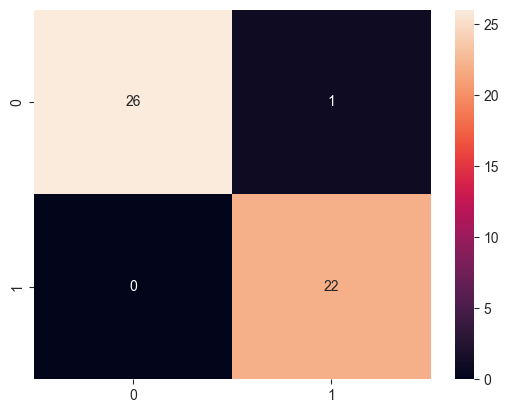

In [37]:
# 3. Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# training
rfc.fit(X_train_scaled, y_train)

# prediction
rfc_pred = rfc.predict(X_test_scaled)

# evaluate
score = accuracy_score(y_test, rfc_pred)
cr = classification_report(y_test, rfc_pred)

print("Random Forest Report")
print(f"Accuracy Score: {score:.3f}%")
print("Classification Report\n",cr)

print("Confusion Maxtrix\n")
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True)

K Nearest Neighbours Report
Accuracy Score: 0.878%
Classification Report
               precision    recall  f1-score   support

        fire       0.86      0.93      0.89        27
    not fire       0.90      0.82      0.86        22

    accuracy                           0.88        49
   macro avg       0.88      0.87      0.88        49
weighted avg       0.88      0.88      0.88        49

Confusion Maxtrix



<Axes: >

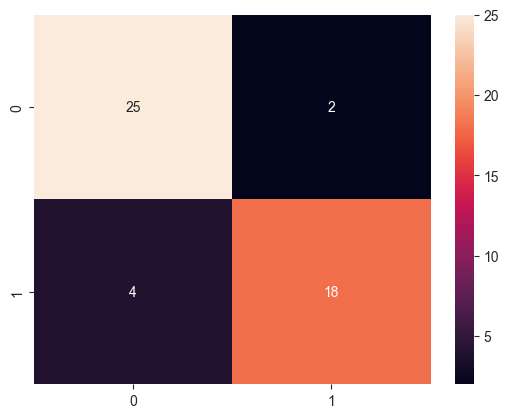

In [38]:
# 4. K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# training
knn.fit(X_train_scaled, y_train)

# prediction
knn_pred = knn.predict(X_test_scaled)

# evaluate
score = accuracy_score(y_test, knn_pred)
cr = classification_report(y_test, knn_pred)

print("K Nearest Neighbours Report")
print(f"Accuracy Score: {score:.3f}%")
print("Classification Report\n",cr)

print("Confusion Maxtrix\n")
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True)

In [39]:
# Random Fores Classifier Tunning

params = {
    "n_estimators": [90, 100, 115, 130],
    "criterion": ["gini", "entropy"],
    "max_depth": range(2,10),
    "min_samples_leaf": range(1,10),
    "min_samples_split": range(2,10),
    "max_features": ['sqrt', 'log2']
}

random_rf = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=params,
    cv = 10,
    n_jobs= 5
)

# training
random_rf.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 10),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [90, 100, 115, 130]})

In [40]:
random_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_split=4,
                       n_estimators=130)

In [41]:
best_rf = random_rf.best_estimator_
best_rf_pred = best_rf.predict(X_test_scaled)
score = accuracy_score(y_test, best_rf_pred)


print("FINAL RANDOM FOREST")
print(f"Accuracy Score: {score:.2f}")
cr = classification_report(y_test, best_rf_pred)
print("Classification Report\n",cr)

FINAL RANDOM FOREST
Accuracy Score: 0.98
Classification Report
               precision    recall  f1-score   support

        fire       1.00      0.96      0.98        27
    not fire       0.96      1.00      0.98        22

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



In [42]:
# Feature Selection

feature_importances = random_rf.best_estimator_.feature_importances_

important_df = pd.DataFrame({
    "features": X_train.columns,
    "importance": feature_importances
    }
).sort_values("importance", ascending=False)

important_df

,features,importance
8,FFMC,0.321292
11,ISI,0.227157
13,FWI,0.142940
12,BUI,0.080907
9,DMC,0.070727
10,DC,0.063767
7,RAIN,0.042128
4,TEMPERATURE,0.032084
5,RH,0.007791
0,Unnamed: 0,0.005278


Text(0, 0.5, 'Features')

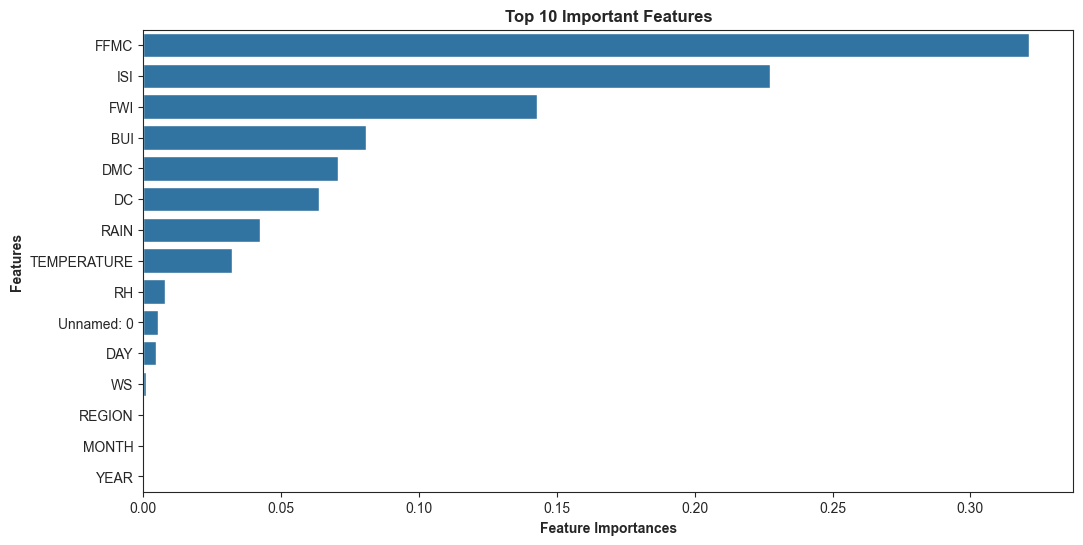

In [43]:
plt.figure(figsize=(12,6))
sns.set_style("ticks")
ax = sns.barplot(data=important_df, x="importance", y="features")
ax.set_title("Top 10 Important Features", weight="bold")
ax.set_xlabel("Feature Importances", weight="bold")
ax.set_ylabel("Features", weight="bold")

In [44]:
# save the model
import joblib

joblib.dump(best_rf, "../model/forest_fire.joblib")

['../model/forest_fire.joblib']